In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 랜덤 시드 정하기
tf.set_random_seed(777)

In [82]:
# weight와 bias를 랜덤값으로 설정
# ydata = xdata * w +b

w = tf.Variable(tf.random_normal([1], name='weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

In [83]:
# x, y 값을 받아올 placeholder 구성

# tf.placeholder(데이터 타입, shape=)
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

In [84]:
# 선형식과 cost함수를 설정
## 가설함수 노드
hf = x * w + b
# (예측값 - 실제값)^2 의 합들의 평균
cost = tf.reduce_mean(tf.square(hf - y))

In [85]:
# 옵티마이져 및 학습률 설정
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# cost를 최소화 하도록 수정하는 함수
train = opt.minimize(cost)

In [86]:
# 모델 실행
## 세션 실행
sess = tf.Session()
# 변수를 사용하기 위한 초기화
sess.run(tf.global_variables_initializer())

In [87]:
# 모델을 몇 번 실행할 것인가 ?
for step in range(2001):
    # _는 값을 무시한다. 
    _, cv, bv, wv = sess.run([train, cost, b, w], feed_dict={x:[1,2,3] ,
                               y:[2,3,4]})
    if step % 100 == 0 :
        print(step, cv, bv, wv)

0 34.090366 [-1.4497697] [-0.31781602]
100 0.21868162 [-0.23169614] [1.5418066]
200 0.13513193 [0.03177993] [1.4259217]
300 0.083503366 [0.23889075] [1.3348132]
400 0.05159996 [0.40169883] [1.2631935]
500 0.03188562 [0.5296811] [1.2068942]
600 0.019703357 [0.63028646] [1.1626376]
700 0.012175504 [0.7093713] [1.127848]
800 0.007523723 [0.77153945] [1.1005002]
900 0.004649184 [0.8204093] [1.0790021]
1000 0.002872918 [0.85882527] [1.0621032]
1100 0.001775284 [0.88902384] [1.0488186]
1200 0.0010970227 [0.9127625] [1.0383759]
1300 0.0006778997 [0.93142325] [1.030167]
1400 0.00041889554 [0.9460925] [1.0237141]
1500 0.00025885602 [0.9576235] [1.0186414]
1600 0.00015995596 [0.96668863] [1.0146537]
1700 9.8839984e-05 [0.9738143] [1.0115192]
1800 6.107768e-05 [0.9794156] [1.009055]
1900 3.7742455e-05 [0.9838186] [1.0071182]
2000 2.3324204e-05 [0.98727983] [1.0055957]


In [88]:
# 예측
print(sess.run(hf, feed_dict={x:[10]}))
print(sess.run(hf, feed_dict={x:[10,10.5]}))
print(sess.run(hf, feed_dict={x:[10,10.5,11]}))

[11.043237]
[11.043237 11.546035]
[11.043237 11.546035 12.048832]


In [81]:
# 변수값 초기화
w = tf.Variable([100.], tf.float32)
b = tf.Variable([-10.], tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# 모델 생성
# hf = 100 * x - 10
hf = x * w + b
# cost = loss
cost = tf.reduce_sum(tf.square(hf-y))

opt = tf.train.GradientDescentOptimizer(0.01)
train = opt.minimize(cost)

xtrain = [1,2,3,4,5]
ytrain = [0,-1,-2,-3,-4]

# 트레이닝
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    sess.run(train, {x:xtrain, y:ytrain})
    
wv, bv, cv = sess.run([w, b, cost], {x:xtrain ,y:ytrain})

print('weight %s, bias : %s, cost : %s' %(wv,bv,cv))

weight [-0.9999995], bias : [0.99999833], cost : 2.5579538e-12


In [139]:
### 연습문제

x = [1,3,5]
y = [10,28,40]

# b는 무시
w = tf.placeholder(tf.float32)

hf = x * w
loss = tf.reduce_mean(tf.square(hf - y))

# opt = tf.train.GradientDescentOptimizer(0.01)
# train = opt.minimize(cost)

# 선형 회귀모델 작성
# 시각화 -> weight 값이 -3 ~ 5 까지 0.1씩 증가시켜 가면서 cost 값의 변화를 출력

sess = tf.Session()

sess.run(tf.global_variables_initializer())

lv = []
cv = []
for i in list(np.arange(-60, 75, 0.1)):
    l = sess.run(loss, feed_dict={w:i})
    cv.append(i)
    lv.append(l)

In [140]:
import matplotlib.pyplot as plt

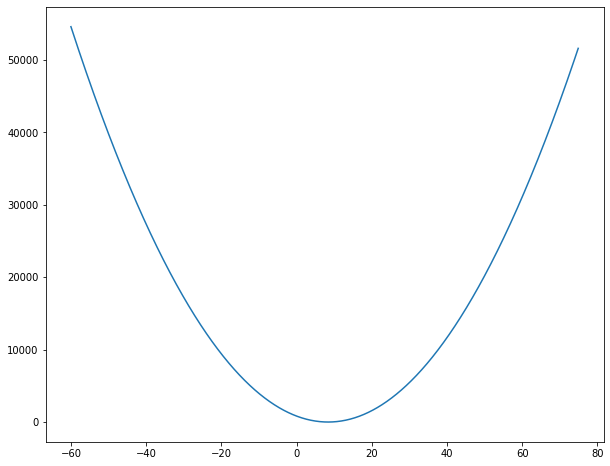

In [141]:
plt.figure(figsize=(10,8))
plt.plot(cv, lv)

In [144]:
### 경사하강법에서 update 구문 작성
xdata = [1,2,3]
ydata = [1,2,3]

w = tf.Variable(tf.random_normal([1]))

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

hf = x * w
cost = tf.reduce_mean(tf.square(hf - y))

# 경사하강법 구현
lr = 0.1

grdient = tf.reduce_mean((w * x - y) * x)  # 미분
descent = w - lr * grdient
# tensorflow에서는 할당을 할 때 assign 함수로만 가능하다.
update = w.assign(descent)

In [145]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    _, cv, wv = sess.run([update, cost, w], feed_dict={x:xdata, y:ydata})
    print(step, wv, cv)

0 [0.8093711] 0.59619296
1 [0.8983313] 0.16958368
2 [0.9457767] 0.048237104
3 [0.9710809] 0.013720776
4 [0.98457646] 0.0039027936
5 [0.99177414] 0.0011101322
6 [0.99561286] 0.00031576783
7 [0.9976602] 8.981933e-05
8 [0.9987521] 2.5547723e-05
9 [0.99933445] 7.2669877e-06
10 [0.99964505] 2.0669447e-06
11 [0.9998107] 5.878943e-07
12 [0.999899] 1.6723531e-07
13 [0.9999461] 4.7552575e-08
14 [0.9999713] 1.35488945e-08
15 [0.9999847] 3.8586307e-09
16 [0.99999183] 1.0968755e-09
17 [0.99999565] 3.1215208e-10
18 [0.9999977] 8.887113e-11
19 [0.99999875] 2.4941235e-11
20 [0.99999934] 7.461883e-12


# multi variable linear regression

In [156]:
x1data = [73,93,90,95,72]  # 5명 모의고사 점수
x2data = [80,88,92,98,66]
x3data = [75,92,90,100,70]

ydata = [152,185,180,195,140]  # 5명 수능 점수

In [157]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [158]:
# hf = x * w + b
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = x1 * w1 + x2 * w2 + x3 * w3 + b

cost = tf.reduce_mean(tf.square(hf - y))

opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

In [159]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cv, hfv, _ = sess.run([cost, hf, train], feed_dict={x1:x1data, x2:x2data, x3:x3data, y:ydata})
    if step % 100 == 0:
        print(step, cv, hfv)

0 50209.082 [-47.2463   -55.498383 -55.94022  -58.94895  -42.617058]
100 2.2632785 [151.6981  182.76897 181.41922 196.7566  138.9286 ]
200 2.2197587 [151.66731 182.7937  181.41187 196.74374 138.95772]
300 2.1783183 [151.63727 182.81778 181.4047  196.73111 138.98608]
400 2.1387858 [151.60803 182.8413  181.39775 196.71872 139.01381]
500 2.1011376 [151.57956 182.86423 181.39105 196.70657 139.04085]
600 2.0652616 [151.5518  182.88658 181.38454 196.69466 139.06721]
700 2.0310302 [151.52477 182.90839 181.3782  196.68294 139.09296]
800 1.9984124 [151.49846 182.92967 181.37212 196.67146 139.11809]
900 1.9673065 [151.47281 182.95042 181.36618 196.66019 139.14258]
1000 1.9376526 [151.44785 182.97066 181.36044 196.64912 139.16649]
1100 1.9093659 [151.42351 182.99037 181.35486 196.63824 139.18982]
1200 1.8824135 [151.39981 183.00961 181.34949 196.6276  139.21259]
1300 1.856665 [151.37677 183.02843 181.34431 196.61714 139.23483]
1400 1.8321002 [151.3543  183.04672 181.33925 196.60683 139.2565 ]
150

# 행렬로

In [189]:
xdata = [[73,93,90,95,72],  # 5명 모의고사 점수
        [80,88,92,98,66],
        [75,92,90,100,70]]
ydata = [[152],[185],[180],[195],[140]]  # 5명 수능 점수

# 배열로 만들고 전치
xdata = np.array(xdata).T

In [190]:
xdata.shape  # 5,3
np.shape(ydata)  # 5,1

(5, 1)

In [191]:
x = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

In [192]:
# hf = x * w + b
# (None,3) * (3,1) + 1

# 행렬곱 함수 matmul
hf = tf.matmul(x, w) + b

cost = tf.reduce_mean(tf.square(hf - y))

opt = tf.train.GradientDescentOptimizer(1e-5)

train = opt.minimize(cost)

In [193]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    _,cv,hfv,wv = sess.run([train, cost, hf, w], feed_dict={x:xdata, y:ydata})
    
    if step % 100 == 0:
        print('{} \n cost:{},\n hf:{}'.format(step, cv, hfv), end='\n\n')

0 
 cost:54736.4375,
 hf:[[-50.437664]
 [-70.100464]
 [-64.62681 ]
 [-68.77898 ]
 [-55.45664 ]]

100 
 cost:23.729286193847656,
 hf:[[157.10413]
 [178.72977]
 [183.11307]
 [198.1131 ]
 [134.17798]]

200 
 cost:22.62679672241211,
 hf:[[156.93933]
 [178.85626]
 [183.06706]
 [198.062  ]
 [134.32472]]

300 
 cost:21.57847023010254,
 hf:[[156.77867]
 [178.97961]
 [183.02223]
 [198.01218]
 [134.46786]]

400 
 cost:20.581632614135742,
 hf:[[156.62202]
 [179.09988]
 [182.97852]
 [197.96346]
 [134.6074 ]]

500 
 cost:19.633686065673828,
 hf:[[156.4693 ]
 [179.2172 ]
 [182.93594]
 [197.91594]
 [134.74353]]

600 
 cost:18.73245620727539,
 hf:[[156.32042]
 [179.33156]
 [182.89449]
 [197.86955]
 [134.87627]]

700 
 cost:17.875385284423828,
 hf:[[156.17525]
 [179.44308]
 [182.85405]
 [197.82422]
 [135.00569]]

800 
 cost:17.060413360595703,
 hf:[[156.0337 ]
 [179.55183]
 [182.81465]
 [197.77997]
 [135.13191]]

900 
 cost:16.285533905029297,
 hf:[[155.89574]
 [179.65788]
 [182.77629]
 [197.73677]
 [1

In [196]:
data = pd.read_csv('data/data-01-test-score.csv', header=None)
data

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [237]:
xdata = np.array(data.iloc[:,0:3])  # 25, 4
ydata = np.array(data.iloc[:,3])    # 25, 1

In [238]:
x = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.matmul(x,w) + b

cost = tf.reduce_mean(tf.square(hf - y))

opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())



for step in range(2001):
    _, cv, hfv = sess.run([train, cost, hf], feed_dict={x:xdata, y:ydata})
    
    if step % 100 == 0 :
        print('{}\ncost:{}\nhf:{}'.format(step, cv, hfv))
    
    if step == 2000 :
        ypred = hfv

0
cost:6624.603515625
hf:[[ 81.116234]
 [ 99.268105]
 [ 97.02109 ]
 [103.692566]
 [ 77.85727 ]
 [ 54.72843 ]
 [ 74.3123  ]
 [ 50.379726]
 [ 90.860435]
 [ 80.070274]
 [ 74.15183 ]
 [ 73.19443 ]
 [102.24626 ]
 [ 87.96404 ]
 [ 74.71418 ]
 [ 98.70881 ]
 [ 86.72205 ]
 [ 87.45096 ]
 [ 97.518326]
 [ 86.743286]
 [ 88.03219 ]
 [ 91.13821 ]
 [ 84.34565 ]
 [ 86.45872 ]
 [103.492   ]]
100
cost:1120.642822265625
hf:[[150.69766 ]
 [183.04391 ]
 [179.47798 ]
 [193.65565 ]
 [141.65443 ]
 [102.03212 ]
 [141.85406 ]
 [100.727486]
 [169.38713 ]
 [153.17648 ]
 [139.10255 ]
 [137.36409 ]
 [187.27197 ]
 [158.42447 ]
 [142.6062  ]
 [183.86227 ]
 [153.67552 ]
 [168.57468 ]
 [178.53015 ]
 [159.24379 ]
 [167.19792 ]
 [169.8803  ]
 [159.76566 ]
 [156.23329 ]
 [190.21626 ]]
200
cost:1116.41162109375
hf:[[150.56085 ]
 [183.0134  ]
 [179.36555 ]
 [193.68822 ]
 [141.53792 ]
 [102.20389 ]
 [142.07365 ]
 [101.158554]
 [169.58058 ]
 [153.71228 ]
 [139.19481 ]
 [137.57451 ]
 [186.99834 ]
 [157.98428 ]
 [142.8642  ]
 [18

In [246]:
sess.run(hf, feed_dict={x:[[90,90,90]]})  # 178로 예상

array([[178.41196]], dtype=float32)

# Logistic regression (Classification)

In [347]:
xdata = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
ydata = [[0],[0],[0],[1],[1],[1]]

In [348]:
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

In [349]:
# sigmoid 활성화 함수
hf = tf.sigmoid(tf.matmul(x,w) + b)

cost = -tf.reduce_mean( y * tf.log(hf) + (1 - y) * tf.log(1 - hf) )

In [350]:
# opt와 train을 한 노드로 구성
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [351]:
# 임계치를 0.5로
#                     조건          데이터타입     => 1.0 or 0.0
predicted = tf.cast(hf > 0.5, dtype=tf.float32)

# tf.equal 안에 들어온 값이 같으면 True 다르면 False
accuracy = tf.cast(tf.equal(predicted, y), dtype=tf.float32)

In [352]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(20001):
        _, hfv, cv = sess.run([train, hf, cost], feed_dict={x:xdata, y:ydata})
        if step % 1000 == 0:
            print('%s step \n cost : %s' % (step,cv))
            
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print('예측값 : %s,\n 예측분류 : %s,\n 판단 : %s'%(hv, pv, av))

0 step 
 cost : 4.341135
1000 step 
 cost : 0.6972429
2000 step 
 cost : 0.6337049
3000 step 
 cost : 0.5923927
4000 step 
 cost : 0.5630381
5000 step 
 cost : 0.54092497
6000 step 
 cost : 0.523343
7000 step 
 cost : 0.5086995
8000 step 
 cost : 0.49603057
9000 step 
 cost : 0.484736
10000 step 
 cost : 0.4744313
11000 step 
 cost : 0.46486446
12000 step 
 cost : 0.45586613
13000 step 
 cost : 0.4473209
14000 step 
 cost : 0.43914816
15000 step 
 cost : 0.43129098
16000 step 
 cost : 0.42370823
17000 step 
 cost : 0.41636983
18000 step 
 cost : 0.40925336
19000 step 
 cost : 0.40234172
20000 step 
 cost : 0.39562145
예측값 : [[0.17549132]
 [0.22155122]
 [0.69717467]
 [0.62818426]
 [0.8045498 ]
 [0.94811827]],
 예측분류 : [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]],
 판단 : [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]]


# 실습

In [3]:
data = pd.read_csv('data/dataset/ThoraricSurgery.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [87]:
xdata = np.array(data.iloc[:,:17])
ydata = np.array(data.iloc[:,-1]).reshape(470,1)

In [88]:
scaler = RobustScaler()
xdata = scaler.fit_transform(xdata)

In [89]:
x = tf.placeholder(tf.float32, shape=[None,17])
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([17, 1], mean=0.01, stddev=0.01), name='weight')
b = tf.Variable(tf.random_normal([1]))

In [90]:
hf = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean( y * tf.log(hf) + (1 - y) * tf.log(1 - hf) )

In [91]:
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [92]:
# 임계치를 0.5로
#                     조건          데이터타입     => 1.0 or 0.0
predicted = tf.cast(hf > 0.45, dtype=tf.float32)

# tf.equal 안에 들어온 값이 같으면 True 다르면 False
accuracy = tf.cast(tf.equal(predicted, y), dtype=tf.float32)

In [93]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(40001):
        _, cv = sess.run([train, cost], feed_dict={x:xdata, y:ydata})
        if step % 10000 == 0 :
            print('%s Step \n Cost : \n%s' %(step, cv))
            
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    
    acc = av.sum() / av.shape[0] * 100
    # 예측값 : %s,\n 예측분류 : %s,\n 
    print('정확도 : %s'%(acc))

0 Step 
 Cost : 
0.77841395
10000 Step 
 Cost : 
0.4047715
20000 Step 
 Cost : 
0.3935637
30000 Step 
 Cost : 
0.38924652
40000 Step 
 Cost : 
0.3864512
정확도 : 85.1063829787234


In [94]:
pv.sum()

8.0

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [100]:
data = pd.read_csv('data/dataset/ThoraricSurgery.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [108]:
xdata = np.array(data.iloc[:,:17])
ydata = np.array(data.iloc[:,-1]).reshape(470,1)

scaler = RobustScaler()
xdata = scaler.fit_transform(xdata)

In [109]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata,ydata, train_size=0.7, random_state = 777)

In [110]:
x = tf.placeholder(tf.float32, shape=[None,17])
y = tf.placeholder(tf.float32, shape=[None,1])

# cost의 nan을 방지하기 위해 weight 의 평균과 표준편차를 정해준다.
w = tf.Variable(tf.random_normal([17, 1], mean=0.01, stddev=0.01), name='weight')
b = tf.Variable(tf.random_normal([1]))

In [111]:
hf = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean( y * tf.log(hf) + (1 - y) * tf.log(1 - hf) )

In [115]:
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [116]:
# 임계치를 0.5로
#                     조건          데이터타입     => 1.0 or 0.0
predicted = tf.cast(hf > 0.45, dtype=tf.float32)

# tf.equal 안에 들어온 값이 같으면 True 다르면 False
accuracy = tf.cast(tf.equal(predicted, y), dtype=tf.float32)

In [114]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(30001):
        _, cv = sess.run([train, cost], feed_dict={x:xtrain, y:ytrain})
        if step % 1000 == 0 :
            print('%s Step \n Cost : \n%s' %(step, cv))
    
    # test 데이터셋으로 모델 평가
    hv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xtest, y:ytest})
    
    acc = av.sum() / av.shape[0] * 100
    
    print('예측값 : %s,\n 예측분류 : %s,\n 정확도 : %s'%(hv, pv, acc))

0 Step 
 Cost : 
0.86008245
1000 Step 
 Cost : 
0.65655875
2000 Step 
 Cost : 
0.5597251
3000 Step 
 Cost : 
0.50726646
4000 Step 
 Cost : 
0.47686008
5000 Step 
 Cost : 
0.4581333
6000 Step 
 Cost : 
0.4459894
7000 Step 
 Cost : 
0.43775842
8000 Step 
 Cost : 
0.4319578
9000 Step 
 Cost : 
0.42772397
10000 Step 
 Cost : 
0.4245323
11000 Step 
 Cost : 
0.42205352
12000 Step 
 Cost : 
0.4200744
13000 Step 
 Cost : 
0.41845393
14000 Step 
 Cost : 
0.41709617
15000 Step 
 Cost : 
0.41593498
16000 Step 
 Cost : 
0.41492358
17000 Step 
 Cost : 
0.4140285
18000 Step 
 Cost : 
0.41322544
19000 Step 
 Cost : 
0.41249627
20000 Step 
 Cost : 
0.41182736
21000 Step 
 Cost : 
0.41120836
22000 Step 
 Cost : 
0.4106313
23000 Step 
 Cost : 
0.41008982
24000 Step 
 Cost : 
0.40957898
25000 Step 
 Cost : 
0.40909472
26000 Step 
 Cost : 
0.4086338
27000 Step 
 Cost : 
0.40819353
28000 Step 
 Cost : 
0.40777162
29000 Step 
 Cost : 
0.40736634
30000 Step 
 Cost : 
0.40697607
예측값 : [[0.12508488]
 [0.216359